<a href="https://colab.research.google.com/github/MichelaPascale/AI-Pokemon-Challenge/blob/main/Notebook_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook di training

## Operazioni preliminari

###Import librerie

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import del training set e test set

In [57]:
#train = pd.read_csv("./train.csv")
#test = pd.read_csv("./test.csv")

# con colab non è necessario il ./
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [58]:
#pokemon = pd.read_csv("./pokemon.csv")

pokemon = pd.read_csv("pokemon.csv")

## Analisi dei dati

### Verifica della correttezza dei dati

#### Train e test set

In [55]:
train.sample(5)

,Winner,First_pokemon,Second_pokemon
11610,3,86,3
23900,30,239,30
29541,521,123,521
23783,429,40,429
19812,227,1,227


In [ ]:
train.describe(include="all")

,Winner,First_pokemon,Second_pokemon
count,32000.000000,32000.000000,32000.000000
mean,409.861094,402.504188,402.972438
std,231.054139,229.858711,229.932855
min,1.000000,1.000000,1.000000
25%,207.000000,204.000000,207.000000
50%,423.000000,402.000000,403.000000
75%,607.000000,600.250000,602.000000
max,800.000000,800.000000,800.000000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000 entries, 0 to 31999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Winner          32000 non-null  int64
 1   First_pokemon   32000 non-null  int64
 2   Second_pokemon  32000 non-null  int64
dtypes: int64(3)
memory usage: 750.1 KB


In [ ]:
pd.isnull(train).sum()

Winner            0
First_pokemon     0
Second_pokemon    0
dtype: int64

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Winner          8000 non-null   int64
 1   First_pokemon   8000 non-null   int64
 2   Second_pokemon  8000 non-null   int64
dtypes: int64(3)
memory usage: 187.6 KB


In [ ]:
pd.isnull(test).sum()

Winner            0
First_pokemon     0
Second_pokemon    0
dtype: int64

Ok, non ho valori nulli o altro che devo cambiare

In [ ]:
train.head(5)

,Winner,First_pokemon,Second_pokemon
0,124,124,221
1,1,323,1
2,58,58,459
3,491,180,491
4,799,799,559


#### Pokemon stats

In [ ]:
pokemon.sample(5)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
165,166,Mew,Psychic,NaN,100,100,100,100,100,100,1,False
789,790,Avalugg,Ice,NaN,95,117,184,44,46,28,6,False
446,447,Kricketot,Bug,NaN,37,25,41,25,41,25,4,False
478,479,Honchkrow,Dark,Flying,100,125,52,105,52,71,4,False
635,636,Gothita,Psychic,NaN,45,30,50,55,65,45,5,False


Da una prima analisi, per semplicità e chiarezza, posso rinominare la colonna # in ID ed eliminare gli spazi delle colonne Type 1 e Type 2

In [59]:
# Rinomino
pokemon = pokemon.rename(columns={'#': 'ID'})
pokemon = pokemon.rename(columns={'Type 1': 'Type1'})
pokemon = pokemon.rename(columns={'Type 2': 'Type2'})

In [ ]:
pokemon.head(5)

,ID,Name,Type1,Type2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [ ]:
pokemon.describe(include='all')

,ID,Name,Type1,Type2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
count,800.0000,799,800,414,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800
unique,NaN,799,18,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,Mega Ampharos,Water,Flying,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,NaN,1,112,97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735
mean,400.5000,NaN,NaN,NaN,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,NaN
std,231.0844,NaN,NaN,NaN,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,NaN
min,1.0000,NaN,NaN,NaN,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,NaN
25%,200.7500,NaN,NaN,NaN,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,NaN
50%,400.5000,NaN,NaN,NaN,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,NaN
75%,600.2500,NaN,NaN,NaN,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,NaN


In [ ]:
pokemon

,ID,Name,Type1,Type2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


In [ ]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          800 non-null    int64 
 1   Name        799 non-null    object
 2   Type1       800 non-null    object
 3   Type2       414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


##### Valori nulli Pokemon stats

In [ ]:
#Verifica dei valori nulli

pd.isnull(pokemon).sum()

ID              0
Name            1
Type1           0
Type2         386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

Type2 ha 386 valori nulli, ma prima di modificare il dataframe, analizzo i dati e, dai grafici, cerco delle info che possano essere utili

In [ ]:
t2_nan_values = pokemon.loc[pokemon['Type2'].isnull()]

In [ ]:
t2_nan_values

,ID,Name,Type1,Type2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,6,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False
9,10,Squirtle,Water,NaN,44,48,65,50,64,43,1,False
10,11,Wartortle,Water,NaN,59,63,80,65,80,58,1,False
11,12,Blastoise,Water,NaN,79,83,100,85,105,78,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
775,776,Sliggoo,Dragon,NaN,68,75,53,83,113,60,6,False
776,777,Goodra,Dragon,NaN,90,100,70,110,150,80,6,False
788,789,Bergmite,Ice,NaN,55,69,85,32,35,28,6,False
789,790,Avalugg,Ice,NaN,95,117,184,44,46,28,6,False


Ok, adesso grafico i dati ottenuti

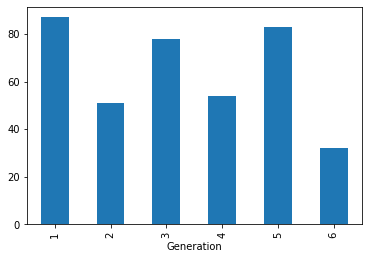

In [ ]:
# Per ogni Generazione vedo quanti pokemon ci sono con Type2 nan

t2_nan_values.groupby('Generation').count().Name.plot(kind='bar')

In [ ]:
t2_nan_values.groupby('Generation').count().Name

Generation
1    87
2    51
3    78
4    54
5    83
6    32
Name: Name, dtype: int64

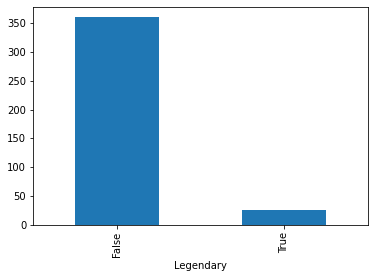

In [ ]:
# Per ogni pokemon leggendario, vedo quanti sono con Type2 nan

t2_nan_values.groupby('Legendary').count().Name.plot(kind='bar')

In [ ]:
t2_nan_values.groupby('Legendary').count().Name

Legendary
False    360
True      25
Name: Name, dtype: int64

Poichè sono dei valori abbastanza distribuiti, e inoltre i valori di Type2 rappresentano il 48,25% del totale, non posso eliminare semplicemente la colonna e nemmeno le righe con i valori a nan (in questo caso perderei una grande quantità di informazione sulle altre features).
Per questo motivo sostituisco i valori posti a nan con una stringa che mi indica semplicemente che quel pokemon non ha quella tipologia. 
Anche se sto aggiungendo un tipologia del pokemon, questo non cambia il significato del dataset.

In [60]:
pokemon["Type2"].replace(np.nan, "No", inplace=True)

In [ ]:
pokemon.sample(5)

,ID,Name,Type1,Type2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
104,105,Drowzee,Psychic,No,60,48,45,43,90,42,1,False
409,410,Mega Salamence,Dragon,Flying,95,145,130,120,90,120,3,False
430,431,Deoxys Defense Forme,Psychic,No,50,70,160,70,160,90,3,True
89,90,Magneton,Electric,Steel,50,60,95,120,70,70,1,False
692,693,Heatmor,Fire,No,85,97,66,105,66,65,5,False


### Grafici sui dati

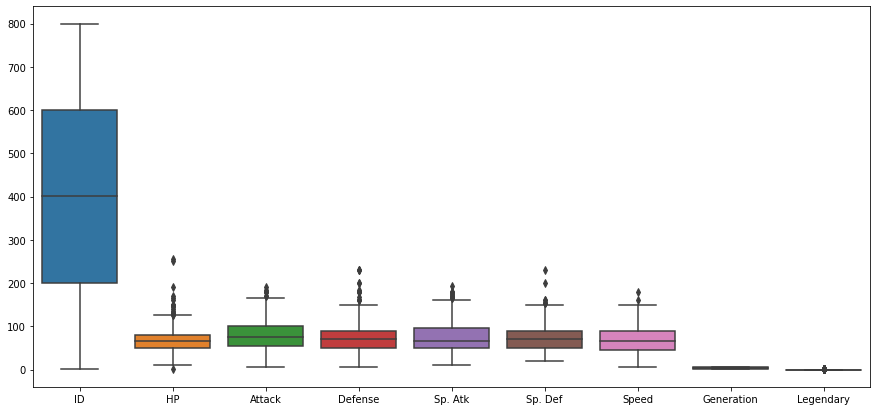

In [ ]:
# Variazioni dei dati in generale

plt.figure(figsize = (15,7))
sns.boxplot(data = pokemon)

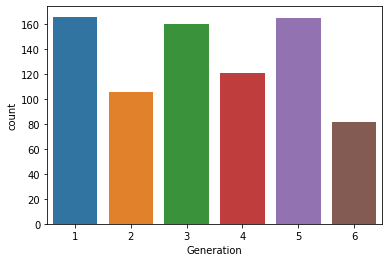

In [ ]:
sns.countplot(x=pokemon["Generation"])

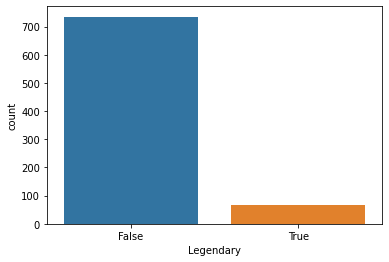

In [ ]:
sns.countplot(x=pokemon["Legendary"])

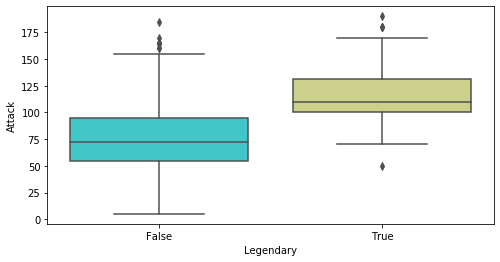

In [ ]:
# boxplot di Attack e Legendary, per verificare se effettivamente i Leggendari hanno più potenza di attacco

plt.figure(figsize=(8, 4))
sns.boxplot(x='Legendary',y='Attack',data=pokemon, palette='rainbow')

Ok, se i pokemon sono leggendari sono più forti in attacco rispetto a quelli che non lo sono, anche se a causa del discostamento le cose potrebbero cambiare

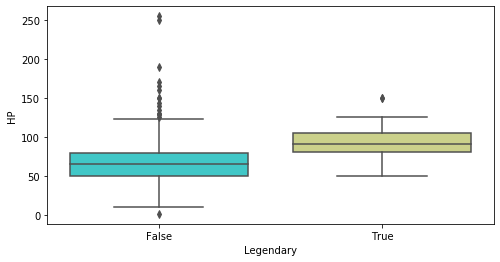

In [ ]:
# boxplot di HP e Legendary, per verificare se effettivamente i Leggendari hanno più punti vita

plt.figure(figsize=(8, 4))
sns.boxplot(x='Legendary',y='HP',data=pokemon, palette='rainbow')

Ok, solitamente questo è vero

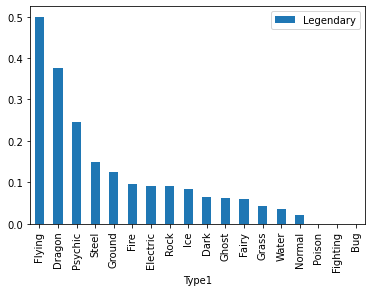

In [ ]:
type_1 = pokemon[['Type1','Legendary']].groupby(['Type1'], as_index=False).mean().set_index('Type1')
type_1.sort_values(by='Legendary',ascending=False).plot(kind='bar')

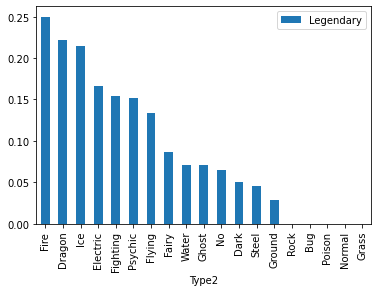

In [ ]:
type_2 = pokemon[['Type2','Legendary']].groupby(['Type2'], as_index=False).mean().set_index('Type2')
type_2.sort_values(by='Legendary',ascending=False).plot(kind='bar')

Analizzando per i leggendari, notiamo che sia Type1 che Type2 potrebbero essere utili per predire quali sono i pokemon leggendari

## Preparazione dei dati

In [61]:
# codifico la colonna 'Winner' trasformando i valori in 1 se il vincitore è First_pokemon, 0 se vince Second_pokemon 

train.loc[train['Winner'] == train['First_pokemon'], 'Winner'] = 1
train.loc[train['Winner'] == train['Second_pokemon'], 'Winner'] = 0

test.loc[test['Winner'] == test['First_pokemon'], 'Winner'] = 1
test.loc[test['Winner'] == test['Second_pokemon'], 'Winner'] = 0

### Merge dei due csv

In [62]:
fights = pd.merge(train, pokemon, left_on='First_pokemon', right_on='ID')
fights_test = pd.merge(test, pokemon, left_on='First_pokemon', right_on='ID')

In [63]:
fights = pd.merge(fights, pokemon, left_on='Second_pokemon', right_on='ID')
fights_test = pd.merge(fights_test, pokemon, left_on='Second_pokemon', right_on='ID')

In [ ]:
fights.head(10)

,Winner,First_pokemon,Second_pokemon,ID_x,Name_x,Type1_x,Type2_x,HP_x,Attack_x,Defense_x,Sp. Atk_x,Sp. Def_x,Speed_x,Generation_x,Legendary_x,ID_y,Name_y,Type1_y,Type2_y,HP_y,Attack_y,Defense_y,Sp. Atk_y,Sp. Def_y,Speed_y,Generation_y,Legendary_y
0,1,382,636,382,Feebas,Water,No,20,15,20,10,55,80,3,False,636,Gothita,Psychic,No,45,30,50,55,65,45,5,False
1,1,366,636,366,Altaria,Dragon,Flying,75,70,90,70,105,80,3,False,636,Gothita,Psychic,No,45,30,50,55,65,45,5,False
2,0,492,636,492,Gible,Dragon,Ground,58,70,45,40,45,42,4,False,636,Gothita,Psychic,No,45,30,50,55,65,45,5,False
3,1,214,636,214,Murkrow,Dark,Flying,60,85,42,85,42,91,2,False,636,Gothita,Psychic,No,45,30,50,55,65,45,5,False
4,1,107,636,107,Krabby,Water,No,30,105,90,25,25,50,1,False,636,Gothita,Psychic,No,45,30,50,55,65,45,5,False
5,0,653,636,653,Amoonguss,Grass,Poison,114,85,70,85,80,30,5,False,636,Gothita,Psychic,No,45,30,50,55,65,45,5,False
6,0,456,636,456,Shieldon,Rock,Steel,30,42,118,42,88,30,4,False,636,Gothita,Psychic,No,45,30,50,55,65,45,5,False
7,1,559,636,559,Pignite,Fire,Fighting,90,93,55,70,55,55,5,False,636,Gothita,Psychic,No,45,30,50,55,65,45,5,False
8,1,637,636,637,Gothorita,Psychic,No,60,45,70,75,85,55,5,False,636,Gothita,Psychic,No,45,30,50,55,65,45,5,False
9,1,129,636,129,Seaking,Water,No,80,92,65,65,80,68,1,False,636,Gothita,Psychic,No,45,30,50,55,65,45,5,False


In [ ]:
fights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32000 entries, 0 to 31999
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Winner          32000 non-null  int64 
 1   First_pokemon   32000 non-null  int64 
 2   Second_pokemon  32000 non-null  int64 
 3   ID_x            32000 non-null  int64 
 4   Name_x          31961 non-null  object
 5   Type1_x         32000 non-null  object
 6   Type2_x         32000 non-null  object
 7   HP_x            32000 non-null  int64 
 8   Attack_x        32000 non-null  int64 
 9   Defense_x       32000 non-null  int64 
 10  Sp. Atk_x       32000 non-null  int64 
 11  Sp. Def_x       32000 non-null  int64 
 12  Speed_x         32000 non-null  int64 
 13  Generation_x    32000 non-null  int64 
 14  Legendary_x     32000 non-null  bool  
 15  ID_y            32000 non-null  int64 
 16  Name_y          31966 non-null  object
 17  Type1_y         32000 non-null  object
 18  Type2_

### Grafici e osservazioni sulle relazioni tra features e vincitori

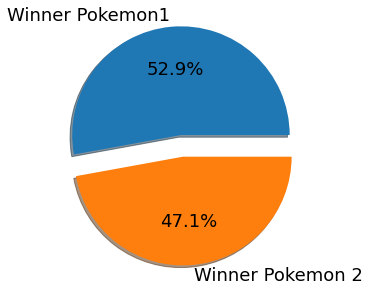

In [66]:
plt.figure(figsize=(5,5))
plt.pie(fights.Winner.value_counts(), labels=["Winner Pokemon1","Winner Pokemon 2"], autopct = '%0.1f%%', 
        textprops={'fontsize': 18}, shadow=True, explode=[0.1, 0.1 ])
plt.show()

Da questo grafico si evince che il pokemon che inizia è quello che effettivamente vince

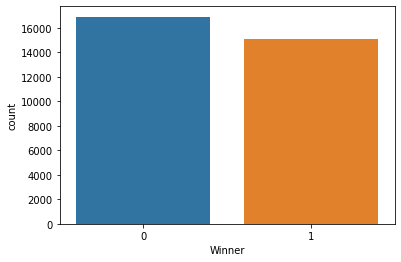

In [ ]:
sns.countplot(x=fights["Winner"])

Mi chiedo se i pokemon leggendari tendono a vincere, rispetto agli altri

In [67]:
conditions = [
    (fights['Winner'] == 1),
    (fights['Winner'] == 0)]
choices = [fights['Legendary_x'], fights['Legendary_y']]
fights['LegendaryWinner'] = np.select(conditions, choices)
fights.sample(20)

,Winner,First_pokemon,Second_pokemon,ID_x,Name_x,Type1_x,Type2_x,HP_x,Attack_x,Defense_x,Sp. Atk_x,Sp. Def_x,Speed_x,Generation_x,Legendary_x,ID_y,Name_y,Type1_y,Type2_y,HP_y,Attack_y,Defense_y,Sp. Atk_y,Sp. Def_y,Speed_y,Generation_y,Legendary_y,LegendaryWinner
467,0,348,800,348,Carvanha,Water,Dark,45,90,20,65,20,65,3,False,800,Volcanion,Fire,Water,80,110,120,130,90,70,6,True,1
27422,0,209,606,209,Yanma,Bug,Flying,65,65,45,75,45,95,2,False,606,Scolipede,Bug,Poison,60,100,89,55,69,112,5,False,0
9388,1,442,364,442,Starly,Normal,Flying,40,55,30,30,30,60,4,False,364,Cacturne,Grass,Dark,70,115,60,115,60,55,3,False,0
25099,0,478,225,478,Mismagius,Ghost,No,60,60,60,105,105,105,4,False,225,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,False,0
6263,0,403,372,403,Huntail,Water,No,55,104,105,94,75,52,3,False,372,Barboach,Water,Ground,50,48,43,46,41,60,3,False,0
28412,0,330,230,330,Mega Mawile,Steel,Fairy,50,105,125,55,95,50,3,False,230,Mega Scizor,Bug,Steel,70,150,140,65,100,75,2,False,0
23819,0,281,334,281,Mudkip,Water,No,50,70,50,50,50,40,3,False,334,Mega Aggron,Steel,No,70,140,230,60,80,50,3,False,0
1569,0,387,384,387,Banette,Ghost,No,64,115,65,83,63,65,3,False,384,Castform,Normal,No,70,70,70,70,70,70,3,False,0
8962,1,537,578,537,Mow Rotom,Electric,Grass,50,65,107,105,107,86,4,False,578,Musharna,Psychic,No,116,55,85,107,95,29,5,False,0
4627,0,260,531,260,Magby,Fire,No,45,75,37,70,55,83,2,False,531,Froslass,Ice,Ghost,70,80,70,80,70,110,4,False,0


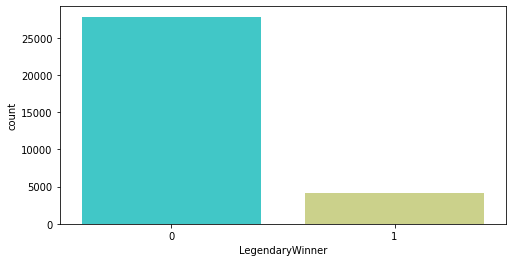

In [80]:
plt.figure(figsize=(8, 4))
sns.countplot(x='LegendaryWinner',data=fights, palette='rainbow')

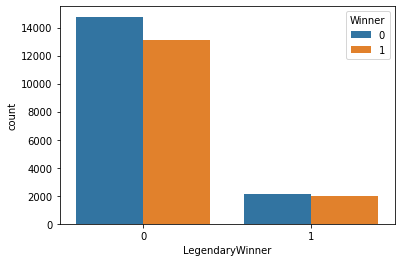

In [ ]:
# Conteggio del numero di scontri vinti da un pokemon leggendario

sns.countplot(x=fights["LegendaryWinner"],hue=fights["Winner"])

## Studio correlazione tra features

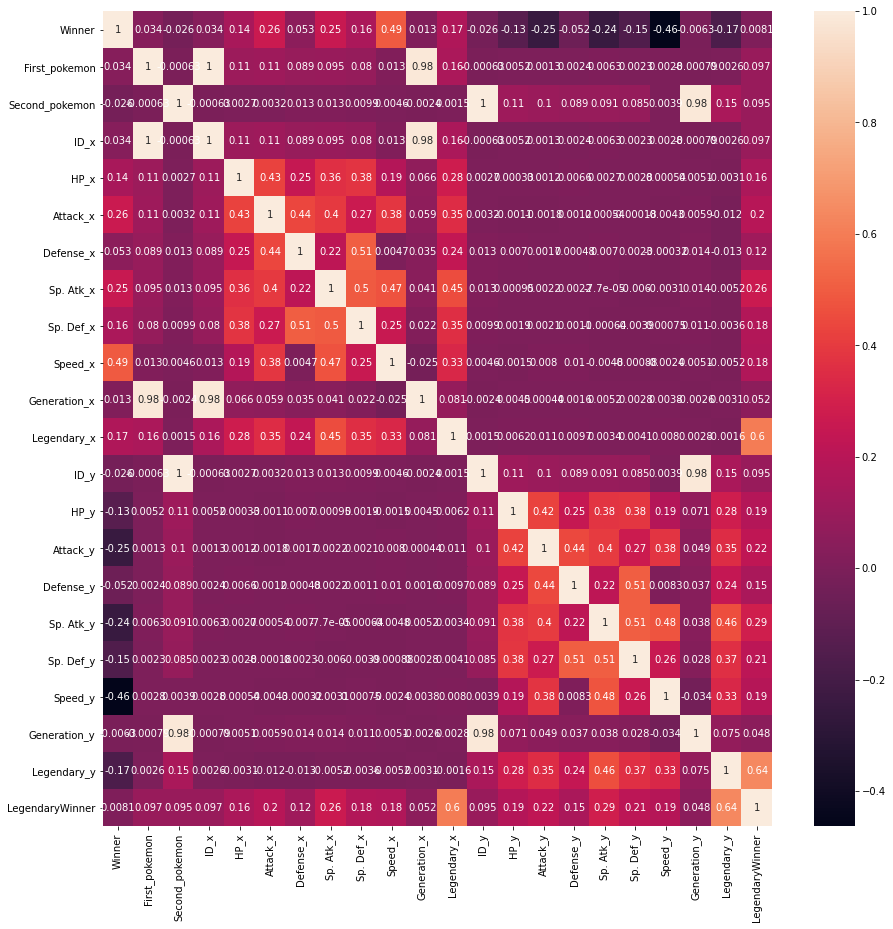

In [ ]:
plt.subplots(figsize=(15,15))
sns.heatmap(fights.corr(), annot=True)
plt.show()

Dalla heatmap si può notare che le features Generation_x e Generation_y hanno un'alta correlazione con l'ID, di conseguenza possono essere eliminate.
Ma alla fine, sia Name che ID sono valori univoci, non utili ai nostri scopi.
Quindi anche questi verranno eliminati.

## Feature engineering

Raggruppo le features, poiché non sono interessata ai singoli valori che essi assumono, ma alla loro differenza. 
Questa infatti mi permette di raggrupparle e dar loro maggiore significato.

Verifico se ho altro da modificare

In [ ]:
fights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32000 entries, 0 to 31999
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Winner           32000 non-null  int64 
 1   First_pokemon    32000 non-null  int64 
 2   Second_pokemon   32000 non-null  int64 
 3   ID_x             32000 non-null  int64 
 4   Name_x           31961 non-null  object
 5   Type1_x          32000 non-null  object
 6   Type2_x          32000 non-null  object
 7   HP_x             32000 non-null  int64 
 8   Attack_x         32000 non-null  int64 
 9   Defense_x        32000 non-null  int64 
 10  Sp. Atk_x        32000 non-null  int64 
 11  Sp. Def_x        32000 non-null  int64 
 12  Speed_x          32000 non-null  int64 
 13  Generation_x     32000 non-null  int64 
 14  Legendary_x      32000 non-null  bool  
 15  ID_y             32000 non-null  int64 
 16  Name_y           31966 non-null  object
 17  Type1_y          32000 non-null

Sia Legendary_x che Legendary_y sono di tipo bool. Le porto a intero.

In [39]:
fights["Legendary_x"] = fights["Legendary_x"].astype(int)
fights["Legendary_y"] = fights["Legendary_y"].astype(int)
fights_test["Legendary_x"] = fights_test["Legendary_x"].astype(int)
fights_test["Legendary_y"] = fights_test["Legendary_y"].astype(int)

Ok, ora posso effettuare la differenza fra i valori delle features

In [40]:
fights["Sp_Atk_diff"] = fights["Sp. Atk_x"] - fights["Sp. Atk_y"]
fights["Speed_diff"] = fights["Speed_x"] - fights["Speed_y"]
fights["Sp_Def_diff"] = fights["Sp. Def_x"] - fights["Sp. Def_y"]
fights["Defense_diff"] = fights["Defense_x"] - fights["Defense_y"]
fights["HP_diff"] = fights["HP_x"] - fights["HP_y"]
fights["Attack_diff"] = fights["Attack_x"] - fights["Attack_y"]
fights["Legendary_diff"] = fights["Legendary_x"] - fights["Legendary_y"]

# Name, ID e Generation vengono implicitamente scartate dalla selezione delle features. Per i motivi dovuti alla correlazione di cui sopra
fights = fights[["Sp_Atk_diff", "Speed_diff", "Sp_Def_diff", 
                 "Defense_diff", "HP_diff", "Attack_diff", 
                 "Type1_x", "Type1_y", "Type2_x", "Type2_y", 
                 "Legendary_diff", "Winner"]]

In [41]:
# Stessa cosa per il test set
fights_test["Sp_Atk_diff"] = fights_test["Sp. Atk_x"] - fights_test["Sp. Atk_y"]
fights_test["Speed_diff"] = fights_test["Speed_x"] - fights_test["Speed_y"]
fights_test["Sp_Def_diff"] = fights_test["Sp. Def_x"] - fights_test["Sp. Def_y"]
fights_test["Defense_diff"] = fights_test["Defense_x"] - fights_test["Defense_y"]
fights_test["HP_diff"] = fights_test["HP_x"] - fights_test["HP_y"]
fights_test["Attack_diff"] = fights_test["Attack_x"] - fights_test["Attack_y"]
fights_test["Legendary_diff"] = fights_test["Legendary_x"] - fights_test["Legendary_y"]

fights_test = fights_test[["Sp_Atk_diff", "Speed_diff", "Sp_Def_diff", 
                 "Defense_diff", "HP_diff", "Attack_diff", 
                 "Type1_x", "Type1_y", "Type2_x", "Type2_y", 
                 "Legendary_diff", "Winner"]]

In [ ]:
fights.sample(10)

,Sp_Atk_diff,Speed_diff,Sp_Def_diff,Defense_diff,HP_diff,Attack_diff,Type1_x,Type1_y,Type2_x,Type2_y,Legendary_diff,Winner
15001,-25,-75,-70,-15,-10,-30,Ice,Water,Water,Poison,0,0
29573,0,-30,-15,-5,30,40,Fairy,Fighting,No,Psychic,0,1
5989,25,5,10,85,45,60,Ground,Water,Flying,No,0,1
25265,55,75,45,45,65,30,Grass,Bug,No,Grass,1,1
10023,35,-11,40,35,37,50,Water,Normal,Ground,Flying,0,0
22265,-3,48,-10,35,45,47,Normal,Psychic,No,No,0,1
29140,-45,86,-22,-12,-35,35,Electric,Psychic,No,No,0,1
13281,-20,34,-40,-5,5,42,Ground,Water,Dark,Ghost,0,1
25691,30,41,30,12,20,27,Poison,Bug,No,No,0,1
4754,21,-33,29,-11,-1,-57,Fairy,Rock,No,Bug,0,0


In [42]:
fights_test.sample(10)

,Sp_Atk_diff,Speed_diff,Sp_Def_diff,Defense_diff,HP_diff,Attack_diff,Type1_x,Type1_y,Type2_x,Type2_y,Legendary_diff,Winner
3034,13,10,0,55,5,17,Poison,Bug,Dark,No,0,1
2335,12,-41,67,2,20,-33,Fairy,Fire,No,No,0,0
733,40,15,35,5,60,-5,Ice,Steel,Water,Fairy,0,1
5598,3,7,-40,-40,-78,-42,Psychic,Ghost,Flying,Dragon,-1,1
2690,15,-20,10,-7,15,-10,Fairy,Water,No,No,0,0
2508,43,-30,8,8,25,-52,Poison,Fighting,No,No,0,0
1542,35,10,101,-24,210,-55,Normal,Electric,No,No,0,1
7775,70,31,40,50,49,75,Ground,Fighting,Flying,No,1,1
1802,20,43,-15,-10,-3,-5,Water,Dragon,No,Ground,0,1
6125,-65,-30,-15,-15,-50,-95,Fairy,Electric,No,No,0,0


### Ricerca di nuove correlazioni tra features, dopo il raggruppamento

Quindi, dopo aver effettuato il raggruppamento, ricerco nuovamente la presenza di correlazioni fra le features, al fine di eliminare quelle superflue

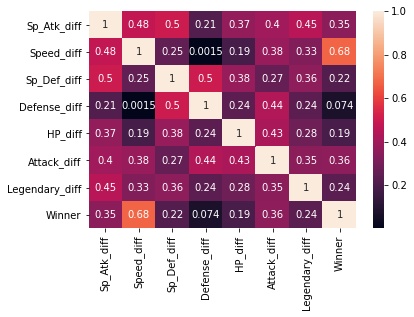

In [43]:
sns.heatmap(fights.corr(), annot=True)
plt.show()

Notiamo che la feature Defense_diff ha una correlazione molto bassa.
Per questo motivo può essere eliminata.

In [44]:
fights = fights.drop('Defense_diff', axis=1)
fights_test = fights_test.drop('Defense_diff', axis=1)

## Addestramento del modello e classificazione con Decision Tree

In [45]:
X_train = fights.drop(["Winner"], axis=1)
y_train = fights["Winner"]

X_test = fights_test.drop(["Winner"], axis=1)
y_test = fights_test["Winner"]

Effettuo l'Encoding

In [46]:
s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in object_cols:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])

Classificazione con DecisionTree

In [51]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy')
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
print('Test Set predictions:', y_pred)

print("Accuracy: {:.2f}%".format(dt.score(X_test, y_test)*100))

Test Set predictions: [1 1 1 ... 1 1 1]
Accuracy: 93.11%
